In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Matplotlib is building the font cache; this may take a moment.


In [7]:
df = pd.read_csv("./internet_users.csv")

In [8]:
df.head()

,Location,Rate (WB),Year,Rate (ITU),Year.1,Users (CIA),Year.2,Notes
0,World,67.4,2023.0,67.4,2023.0,NaN,NaN,NaN
1,Afghanistan,18.4,2020.0,17.6,2019.0,7020000.0,2020.0,NaN
2,Albania,83.1,2023.0,83.1,2023.0,2291000.0,2021.0,NaN
3,Algeria,71.2,2022.0,71.2,2022.0,31240000.0,2021.0,NaN
4,American Samoa,NaN,NaN,NaN,NaN,18135.0,2021.0,NaN


In [10]:
df.rename(columns={"Year.1":"Year1", "Year.2":"Year2"}, inplace=True)
df.columns

Index(['Location', 'Rate (WB)', 'Year', 'Rate (ITU)', 'Year1', 'Users (CIA)',
       'Year2', 'Notes'],
      dtype='object')

In [11]:
df.isnull().sum()

Location         0
Rate (WB)       29
Year            29
Rate (ITU)      11
Year1           11
Users (CIA)      6
Year2            7
Notes          236
dtype: int64

In [12]:
df['Rate (WB)']=df['Rate (WB)'].fillna(df['Rate (WB)'].mean())

In [14]:
df.shape

(238, 8)

In [15]:
df = df.dropna(subset=["Year", "Year1", "Year2"])
df.shape

(207, 8)

In [16]:
df.isnull().sum()

Location         0
Rate (WB)        0
Year             0
Rate (ITU)       0
Year1            0
Users (CIA)      0
Year2            0
Notes          207
dtype: int64

In [17]:
df.drop("Notes", axis=1)

,Location,Rate (WB),Year,Rate (ITU),Year1,Users (CIA),Year2
1,Afghanistan,18.4,2020.0,17.6,2019.0,7020000.0,2020.0
2,Albania,83.1,2023.0,83.1,2023.0,2291000.0,2021.0
3,Algeria,71.2,2022.0,71.2,2022.0,31240000.0,2021.0
5,Andorra,94.5,2022.0,94.5,2022.0,74260.0,2021.0
6,Angola,39.3,2022.0,39.3,2022.0,11550000.0,2021.0
...,...,...,...,...,...,...,...
232,Venezuela,61.6,2017.0,61.6,2017.0,22734162.0,2022.0
233,Vietnam,78.6,2022.0,78.1,2023.0,71780000.0,2021.0
235,Yemen,26.7,2017.0,17.7,2022.0,8229624.0,2022.0
236,Zambia,31.2,2022.0,31.2,2022.0,3990000.0,2021.0


In [18]:
df.head()

,Location,Rate (WB),Year,Rate (ITU),Year1,Users (CIA),Year2,Notes
1,Afghanistan,18.4,2020.0,17.6,2019.0,7020000.0,2020.0,NaN
2,Albania,83.1,2023.0,83.1,2023.0,2291000.0,2021.0,NaN
3,Algeria,71.2,2022.0,71.2,2022.0,31240000.0,2021.0,NaN
5,Andorra,94.5,2022.0,94.5,2022.0,74260.0,2021.0,NaN
6,Angola,39.3,2022.0,39.3,2022.0,11550000.0,2021.0,NaN


In [19]:
df.describe()

,Rate (WB),Year,Rate (ITU),Year1,Users (CIA),Year2
count,207.000000,207.000000,207.000000,207.000000,2.070000e+02,207.000000
mean,70.656039,2021.487923,70.221256,2021.806763,2.339401e+07,2021.028986
std,25.154313,1.726042,25.436069,1.539560,8.892435e+07,0.194912
min,10.000000,2016.000000,7.500000,2016.000000,7.920000e+03,2020.000000
25%,54.300000,2021.000000,54.300000,2022.000000,7.445000e+05,2021.000000
50%,78.700000,2022.000000,78.700000,2022.000000,4.320000e+06,2021.000000
75%,90.000000,2022.000000,89.900000,2023.000000,1.283400e+07,2021.000000
max,100.000000,2023.000000,100.000000,2023.000000,1.022000e+09,2022.000000


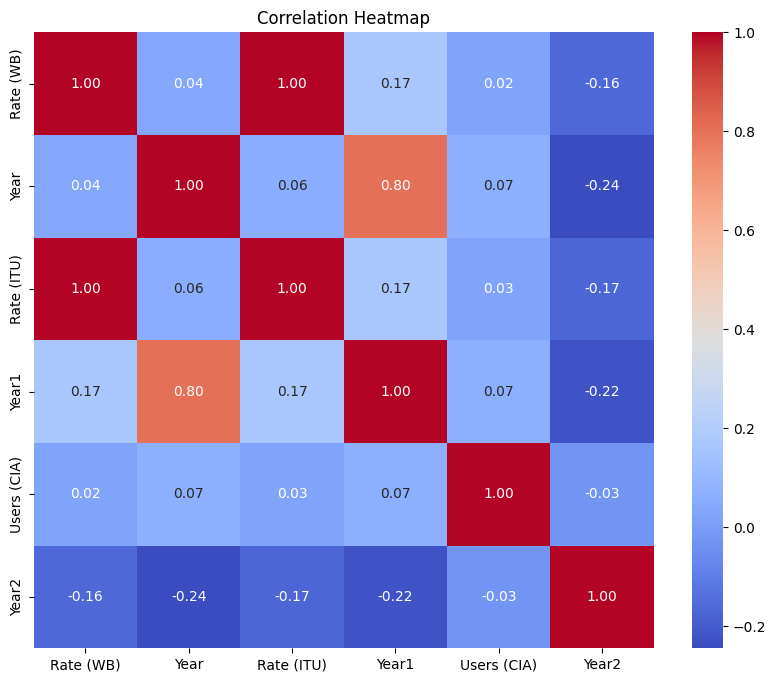

In [73]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sb.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

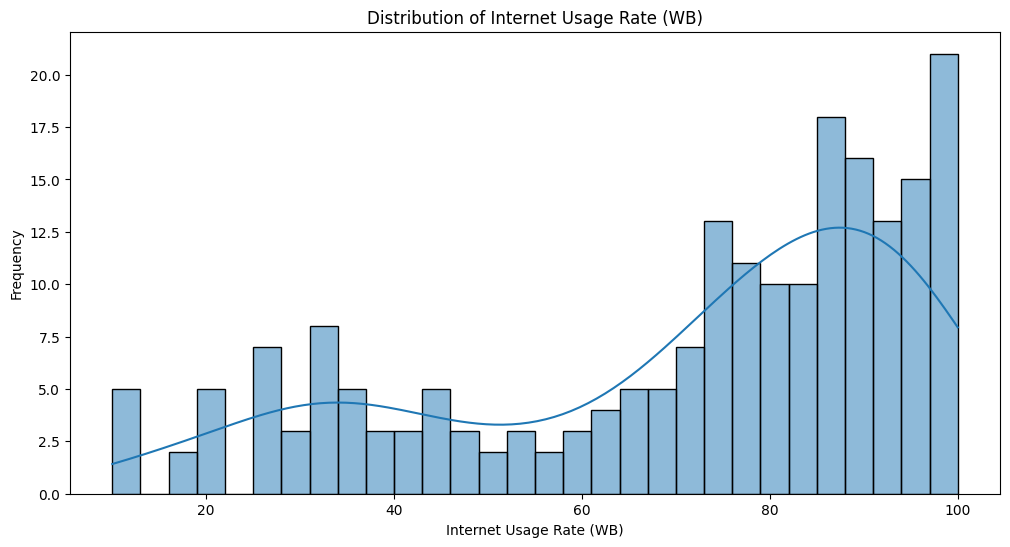

In [75]:
plt.figure(figsize=(12, 6))
sb.histplot(df['Rate (WB)'], bins=30, kde=True)
plt.title('Distribution of Internet Usage Rate (WB)')
plt.xlabel('Internet Usage Rate (WB)')
plt.ylabel('Frequency')
plt.show()

In [30]:
max_rate = df['Rate (WB)'].max()
max_rate

100.0

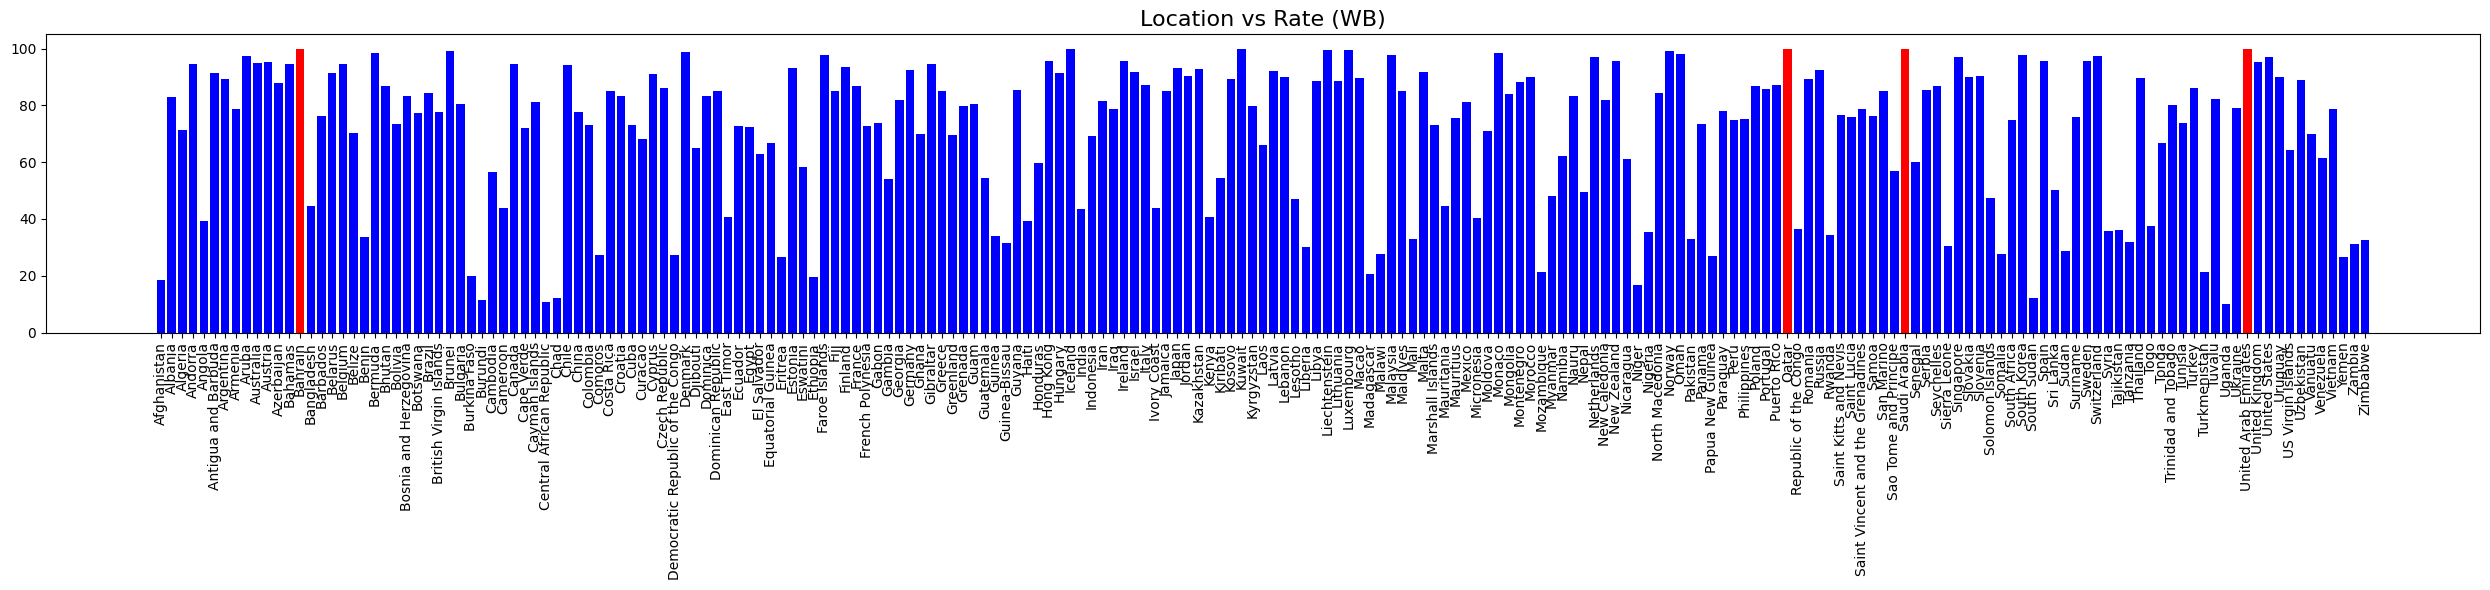

In [68]:
plt.figure(figsize=(25,6))
colors = ['red' if rate == max_rate else 'blue' for rate in df['Rate (WB)']]
bars = plt.bar(df['Location'], df['Rate (WB)'], color=colors)
plt.title('Location vs Rate (WB)', fontsize=16)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

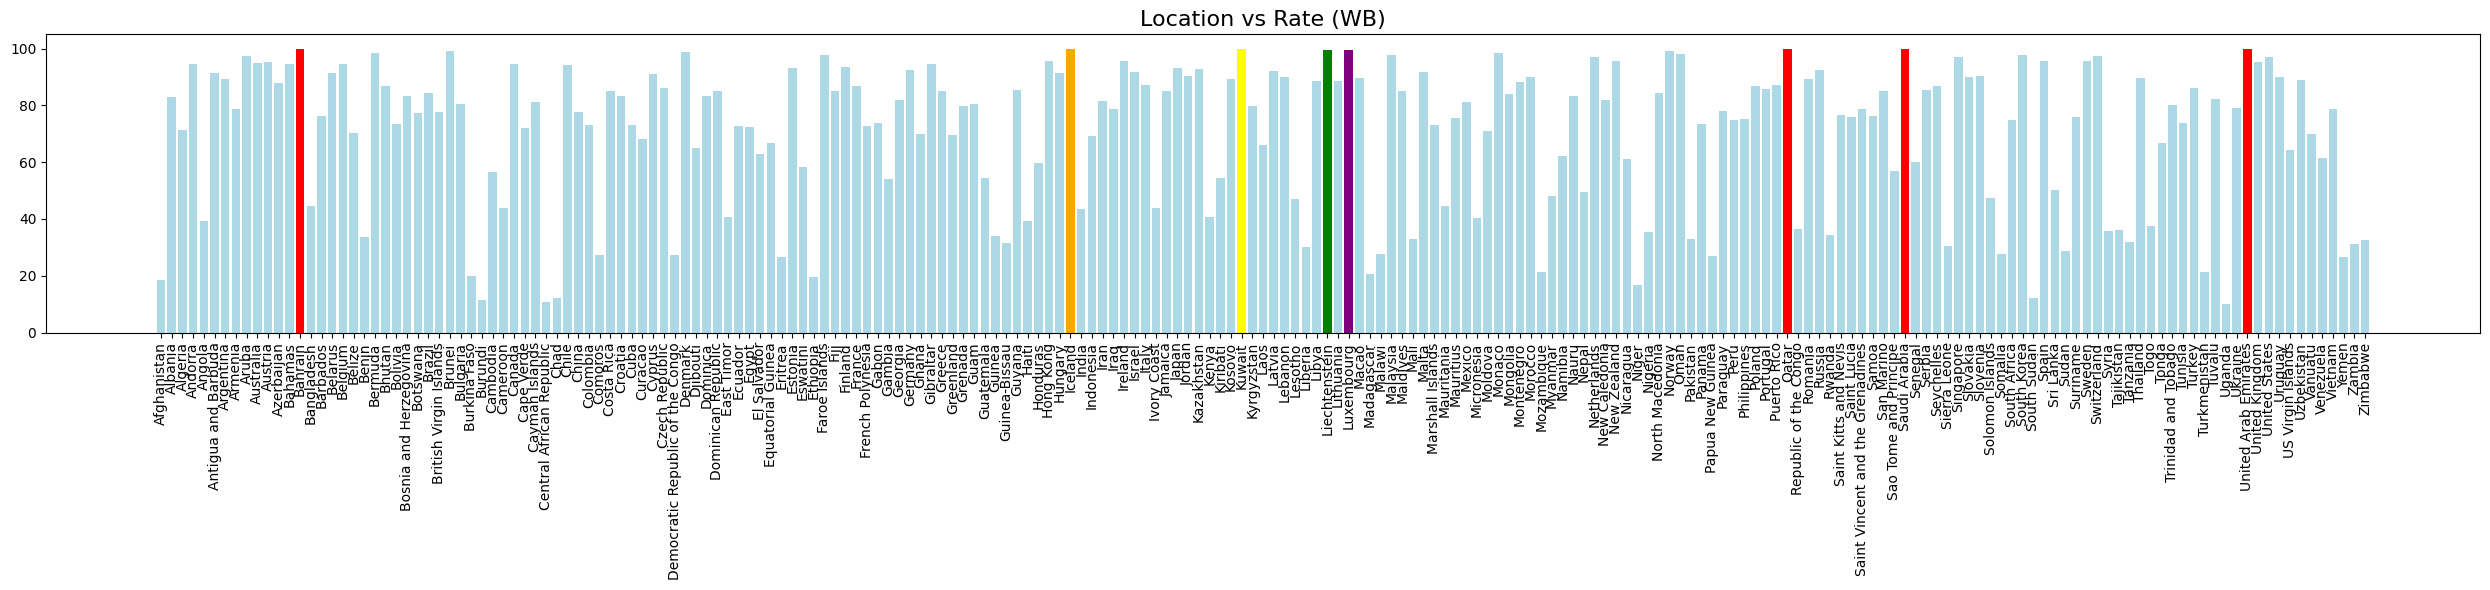

In [40]:
df_sorted = df.sort_values('Rate (WB)', ascending=False)

top_5_rates = df_sorted['Rate (WB)'].unique()[:5]
top_5_colors = ['red', 'orange', 'yellow', 'green', 'purple']

rate_to_color = {rate: color for rate, color in zip(top_5_rates, top_5_colors)}

colors = [rate_to_color.get(rate, 'lightblue') for rate in df['Rate (WB)']]

plt.figure(figsize=(25, 6))
bars = plt.bar(df['Location'], df['Rate (WB)'], color=colors)
plt.title('Location vs Rate (WB)', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

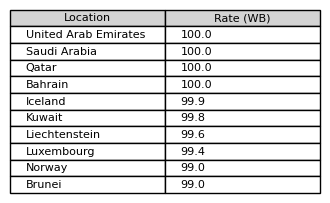

In [64]:
df_sorted = df.sort_values('Rate (WB)', ascending=False)
top_5_table = df_sorted[['Location', 'Rate (WB)']].head(10)
plt.figure(figsize=(4, 0.15))
plt.table(cellText=top_5_table.values, colLabels=top_5_table.columns, loc='center', cellLoc='left', colColours=['lightgray', 'lightgray'])
plt.axis('off')
plt.show()

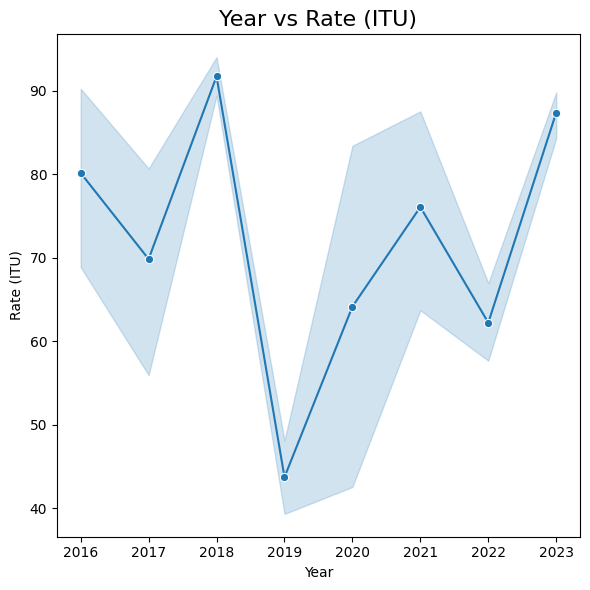

In [72]:
plt.figure(figsize=(6, 6))
sb.lineplot(data=df, x='Year', y='Rate (ITU)', marker='o')
plt.title('Year vs Rate (ITU)', fontsize=16)
plt.tight_layout()
plt.show()